# Problem1:
A research laboratory was developing a new compound for the relief of severe cases of hay fever. 
In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

[Assume all of the ANOVA assumptions are satisfied]

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For n-way ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm 

# For performing the Tukey-HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd 

# To compare the levels of independent variables with the dependent variables
from statsmodels.stats.multicomp import MultiComparison 

%matplotlib inline 

In [3]:
## to define output or conclusion in below format or color.
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
# use to set style of background of plot
sns.set(style="whitegrid")

In [5]:
## load dataset
df = pd.read_csv('Fever.csv') 

In [6]:
## top 5 rows
df.head() 

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


## EDA (Exploratory Data Analysis)

In [7]:
## information about dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [8]:
## check is there any null data in the dataset
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [9]:
df['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [10]:
df['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [11]:
df['Volunteer'].value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

In [12]:
df['Relief'].value_counts()

9.1     2
8.7     2
4.6     2
5.8     1
4.9     1
4.5     1
5.5     1
9.0     1
10.5    1
5.2     1
6.2     1
13.5    1
10.6    1
13.0    1
4.4     1
10.1    1
8.9     1
9.9     1
2.3     1
2.7     1
5.3     1
4.7     1
5.9     1
6.1     1
9.4     1
13.2    1
9.3     1
2.4     1
4.2     1
5.7     1
13.3    1
4.8     1
2.5     1
Name: Relief, dtype: int64

In [13]:
## this will help to summarise the dataset
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
A,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
B,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
Volunteer,36.0,2.500000,1.133893,1.0,1.750,2.5,3.250,4.0
Relief,36.0,7.183333,3.272090,2.3,4.675,6.0,9.325,13.5


#### Describe function is very useful to summarise the data. in this dataset we can see below observations:
1. There are 36 total rows for this dataset.
2. There are 4 numerical variables in the dataset which helps to summarise the trend.
3. Relief Variable: mean is greater than 50%(i.e. median), which stats we have skewness in the data. 

------------------------------------------------ EDA ENDS ---------------------------------------------------------------

## 1.1)  State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

#### --------------------------------------------------------------------  "A"  --------------------------------------------------------------------------------------

### i) Variable "A":

Null hypothesis states that mean relief time for all the three levels in ingredient A are equal.

Alternative hypothesis states that Not all of the mean relief time for all the three levels in ingredient A are equal. In other words, at least one pair has mean relief time in ingredient A are unequal



$H_0$: $\mu_{A1}$ = $\mu_{A2}$ = $\mu_{A3}$
#### (The means between all three levels in ingredient A are equal)





$H_a$: $\mu_{A1}$ $\neq$ $\mu_{A2}$ $\neq$ $\mu_{A3}$ OR $H_a$: $\mu_{A1}$ = $\mu_{A2}$ $\neq$ $\mu_{A3}$ OR $H_a$: $\mu_{A1}$ $\neq$ $\mu_{A2}$ = $\mu_{A3}$ OR $H_a$: $\mu_{A1}$ = $\mu_{A3}$ $\neq$ $\mu_{A2}$     
#### (The means between levels in ingredient A are unequal, {i.e At least one of the means between levels in ingredient A are unequal})

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------

#### --------------------------------------------------------------------  "B"  --------------------------------------------------------------------------------------

### i) Variable "B":

Null hypothesis states that mean relief time for all the three levels in ingredient B are equal.

Alternative hypothesis states that Not all of the mean relief time for all the three levels in ingredient B are equal. In other words, at least one pair has mean relief time in ingredient B are unequal



$H_0$: $\mu_{B1}$ = $\mu_{B2}$ = $\mu_{B3}$
#### (The means between all three levels in ingredient B are equal)





$H_a$: $\mu_{B1}$ $\neq$ $\mu_{B2}$ $\neq$ $\mu_{B3}$ OR $H_a$: $\mu_{B1}$ = $\mu_{B2}$ $\neq$ $\mu_{B3}$ OR $H_a$: $\mu_{B1}$ $\neq$ $\mu_{B2}$ = $\mu_{B3}$ OR $H_a$: $\mu_{B1}$ = $\mu_{B3}$ $\neq$ $\mu_{B2}$     
#### (The means between levels in ingredient B are unequal, {i.e At least one of the means beetween levels in ingredient B are unequal})

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------

#### ---------------------------------------------------------------  END 1.1  -----------------------------------------------------------------------------------------------

## 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

Assumption1: All of the ANOVA assumptions are satisfied

Assumption2: Level of significance: $\alpha$ = 0.05

In [14]:
## create df_varA dataframe with only variable A & Relief
df_varA = df.drop(['B','Volunteer'],axis = 1)
df_varA.head()

,A,Relief
0,1,2.4
1,1,2.7
2,1,2.3
3,1,2.5
4,1,4.6


In [15]:
## To test ANOVA, we need to convert variable "A" from int64 to categorical
df_varA['A']= pd.Categorical(df_varA['A'])

In [16]:
## we can see here variable "A" is converted from int64 to categorical
df_varA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A         36 non-null category
Relief    36 non-null float64
dtypes: category(1), float64(1)
memory usage: 556.0 bytes


#### Let's Perform ANOVA for variable "A"

In [17]:
formula = 'Relief ~ C(A)'
model = ols(formula, df_varA).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


$\textbf{Interpretation:}$ We see that the corresponding p-value is less than $\alpha$ (0.05). Thus, we $\textbf{Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).

#### Hence, we conclude that “there is a significant difference in the mean relief time for the three levels of ingredient A”.

#### ---------------------------------------------------------------  END 1.2  -----------------------------------------------------------------------------------------------

## 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

Assumption1: All of the ANOVA assumptions are satisfied

Assumption2: Level of significance: $\alpha$ = 0.05

In [18]:
## create df_varB dataframe with only variable B & Relief
df_varB = df.drop(['A','Volunteer'],axis = 1)
df_varB.head()

,B,Relief
0,1,2.4
1,1,2.7
2,1,2.3
3,1,2.5
4,2,4.6


In [19]:
## To test ANOVA, we need to convert variable "B" from int64 to categorical
df_varB['B']= pd.Categorical(df_varB['B'])

In [20]:
## we can see here variable "A" is converted from int64 to categorical
df_varB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
B         36 non-null category
Relief    36 non-null float64
dtypes: category(1), float64(1)
memory usage: 556.0 bytes


#### Let's Perform ANOVA for variable "B"

In [21]:
formula = 'Relief ~ C(B)'
model = ols(formula, df_varB).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


$\textbf{Interpretation:}$ We see that the corresponding p-value is less than $\alpha$ (0.05). Thus, we $\textbf{Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).

#### Hence, we conclude that “there is a significant difference in the mean relief time for the three levels of ingredient B”.

#### ---------------------------------------------------------------  END 1.3  -----------------------------------------------------------------------------------------------

## 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is the interaction between the two treatments? 

[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

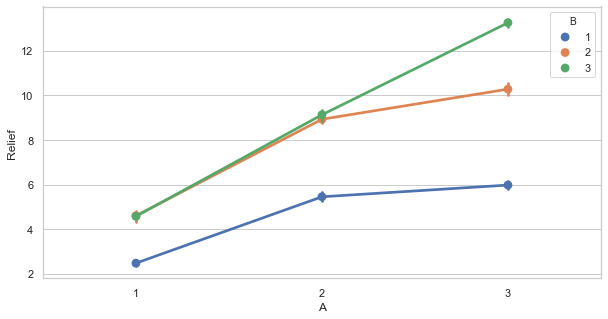

In [22]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
## point plot to see the effect of one variable on another
sns.pointplot(x='A',y='Relief',hue='B',data=df)
plt.show()

From the above interaction plot, since the lines are interacting each other at points: i) (A1,B2 & A1,B3) and ii) (A2,B2 & A2,B3) that means there is an interaction effect of these 2 variables. In other words, the lines are not parallel. This interaction effect indicates that the relationship between ingredient “A” and “relief time” depends on the value of ingredient “B”.

#### Conclusion: The results indicate that the interaction between ingredient “A” and ingredient “B” is significant (very unlikely to be absent).

#### ---------------------------------------------------------------  END 1.4  -----------------------------------------------------------------------------------------------

## 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

In [23]:
## create df_varB dataframe with only variable B & Relief
df_varAB = df.drop(['Volunteer'],axis = 1)
df_varAB.head()

,A,B,Relief
0,1,1,2.4
1,1,1,2.7
2,1,1,2.3
3,1,1,2.5
4,1,2,4.6


### (Without interaction)

In [24]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df_varAB).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


__Conclusion:__ For both ingredient A & ingredient B, P value is __less than 0.05.__ hence, ingredient A & B has the __significant effect on relief time.__

### (With interaction)

In [25]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)' 
model = ols(formula, df_varAB).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


__Conclusion:__ For both ingredient A & ingredient B, P value is __less than 0.05.__ hence, ingredient A & B has the __significant effect on relief time.__ Further, P value of interaction effect between A & B is also less than 0.05. __it means it has significant interaction effect.__

__Final Summary:__ 


We __Reject the null hypothesis (H0).__ Hence, we conclude that _“both factors (ingredient A & ingredient B) have a statistically significant effect on relief time. Further, there is a significant interaction effect between ingredient A and ingredient B”._ 

#### ---------------------------------------------------------------  END 1.5  -----------------------------------------------------------------------------------------------

## 1.6) Mention the business implications of performing ANOVA for this particular case study.

__ANOVA In the Business Context:__

ANOVA is widely used across businesses and industries for a variety of purposes and is a technique that enables _companies to identify problems, trends, risks and opportunities that impact both short and long-term viability._ 

Below are some few considerations within given case study:

•	Quality and cost comparison

•	Product safety tests

•	Optimize production


__Benefits of ANOVA:__

ANOVA has many benefits in both statistical and business contexts. It’s often used when measuring financial data or indifferent management scenarios. Companies can create new opportunities, spot potential issues, and learn to understand what is driving behavior.

•	__Hypothesis Testing:__ Enables the comparison of independent and dependent variables.

•	__Understanding Data Sets:__ An analyst or statistician can best determine inconsistencies in data sets.

•	__Group Comparisons:__ Allows multiple groups to be compared at the same time to uncover relationships between data.

•	__Sales and Marketing Improvement:__ Businesses can answer customer and product research questions to improve advertising and marketing for better sales.

•	__Project Management:__ Leadership, such as project management, can better align their goals and strategies with business and departmental cost objectives.

•	__Industry-Wide Approach:__ ANOVA is effective for a wide variety of uses across different industries, including financial services, eCommerce, industrial, R&D, and more.

•	__Product Development:__ Organizations can better pinpoint and understand what product features to improve or adapt for the best results.


__Business Implications:__

The purpose of this case study (a two-way ANOVA) is to determine how two factors (here ingredient “A” and “B”) impact a response variable (here “Relief”), and to determine whether or not there is an interaction between the two factors on the response variable. 

Descriptive statistics allowed to determining the mean of the independent variable A and B, and the dependent variable, relief time. Using the mean of the independent variables as reference, and computed a two-way ANOVA to analyze the data. 


The ANOVA was __significant, the effect size was strong, allowing to rejecting the null hypothesis, and indicating that there is a statistically significant relationship with strong effect size between ingredient A and ingredient B and relief time.__

#### For Ingredient A:

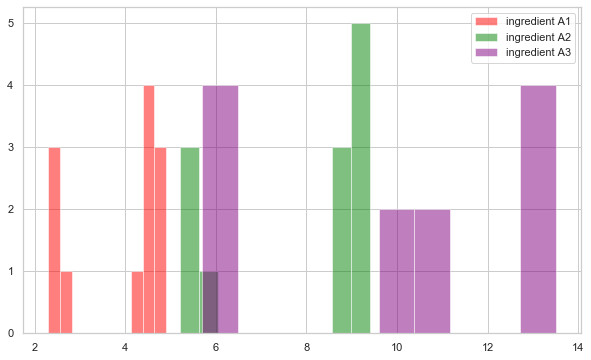

In [33]:
plt.figure(figsize=(10,6))
plt.hist(df_varA[df_varA['A'] == 1]['Relief'],  
        alpha=0.5,  
         label='ingredient A1', 
        color='red')
plt.hist(df_varA[df_varA['A'] == 2]['Relief'],  
         alpha=0.5,  
         label='ingredient A2', 
         color='green')
plt.hist(df_varA[df_varA['A'] == 3]['Relief'],  
         alpha=0.5,  
         label='ingredient A3', 
         color='purple')

plt.legend(loc='upper right') 
plt.show()

__Conclusion:__ Distribution plot of ingredient A with 3 variants says that, they are quite different then each other. There is only small overlay happening  at point 6 otherwise they are quite different. Therefore, we can conclude that the ingredient A with all 3 variants have different treatment.

#### For Ingredient B:

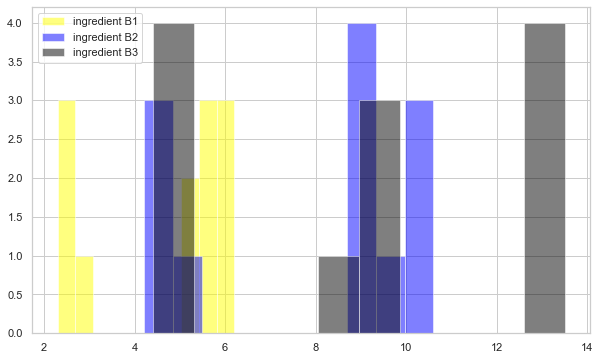

In [34]:
plt.figure(figsize=(10,6))
plt.hist(df_varB[df_varB['B'] == 1]['Relief'],  
        alpha=0.5,  
         label='ingredient B1', 
        color='yellow')
plt.hist(df_varB[df_varB['B'] == 2]['Relief'],  
         alpha=0.5,  
         label='ingredient B2', 
         color='blue')
plt.hist(df_varB[df_varB['B'] == 3]['Relief'],  
         alpha=0.5,  
         label='ingredient B3', 
         color='black')

plt.legend(loc='upper left') 
plt.show()

__Conclusion:__ Distribution plot of ingredient B with 3 variants says that: For variants B2(blue) and B3(black), have somewhat overlay between them. For, the third one B1 (yellow) the distribution seems quite different then the other two.  Therefore, we can conclude that the ingredient B with all 3 variants have different treatment.

__Final Summary:__
    
    
    As these treatments are quite different from each other, look for more samples or other variants which increases product quality and reduces time effort and increases relief time.

#### ---------------------------------------------------------------  END 1.6  -----------------------------------------------------------------------------------------------